# Analyzing Aviation Accidents 
# BUS-241
Yiwei Chai, Sen Gu, Sagar Khurana, Seyar Mohebzada, Maura Oray

# Introduction

This data set provides information on various aircrafts and aircraft accidents, including aircraft damage, engine type, purpose of flight, passenger injury severity (including fatal versus non-fatal). We chose this data set because it provided much information regarding aircrafts and flight crashes; much like the Titanic dataset the predictor variable is binary (fatal/non-fatal, severe/non-severe). In our analysis, we chose the K-Nearest Neighbors, Naive Bayes, Linear and Quadratic Discriminant, Linear SVC, SVC, Decision Tree, and Random Forest models. For each accident, we analyzed and predicted it being "fatal" or "non-fatal".

There was a bit of data preparation before we could begin modeling, including transforming the variables (more details below). Many of the variables had to be transformed to dummy variables as they were originally objects. As is common for "real world" data, we had many NA values and thus made the decision to drop them. We also found duplicates records in "Report_Status" and "Accident_Number" and thus considered them as duplicates and dropped one of each duplicate record. 

# Please access the dataset on Google Drive via: 
https://docs.google.com/spreadsheets/d/1ANRnTbZo6CxFfm25-Wd7C5x-zvnsEBa6shrd9eSznbI/edit#gid=1549168371

Data source: https://public.opendatasoft.com/explore/dataset/ntsb-aviation-accident-dataset/table/

In [1]:
import pandas as pd
import numpy as np
import mglearn

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.kernel_ridge import KernelRidge

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

In [2]:
# Reading the file on Mac: 
aviation = pd.read_csv("../../data/Aviation_cleaned_new.csv")
# Reading the file on Windows: 
#aviation = pd.read_csv("C:/Users/Nannu/OneDrive/Spring 2019/Subjects/Machine Learning/Final Project/Aviation_cleaned_new.csv")
aviation.head()

,Event_Id,Accident_Number,Investigation_Type,Aircraft_Damage,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Non_Fatal_Injuries,Total_Injuries,...,Model,Number_of_Engines,Engine_Type,Purpose_of_Flight,Weather_Condition,Broad_Phase_of_Flight,Event_Date,Year,Period,FAR_Description
0,20150814X91539,WPR15LA242,Accident,Destroyed,Fatal,1.0,0.0,0.0,0.0,1.0,...,LANCAIR EVOLUTION,1.0,Turbo Prop,Personal,VMC,CLIMB,8/13/2015,2015.0,After 2000,Part 91: General Aviation
1,20120307X80412,ERA12FAMS1,Accident,Substantial,Fatal,1.0,0.0,0.0,0.0,1.0,...,182P,1.0,Reciprocating,Personal,VMC,UNKNOWN,3/1/2012,2012.0,After 2000,Part 91: General Aviation
2,20190201X54524,ERA19LA093,Accident,Destroyed,Fatal,2.0,0.0,0.0,0.0,2.0,...,PA32RT,1.0,Reciprocating,Personal,IMC,MANEUVERING,2/1/2019,2019.0,After 2000,Part 91: General Aviation
3,20120925X95448,ERA12LA578,Accident,Substantial,Fatal,1.0,0.0,0.0,0.0,1.0,...,172B,1.0,Reciprocating,Personal,VMC,MANEUVERING,9/23/2012,2012.0,After 2000,Part 91: General Aviation
4,20090915X53650,CEN09LA586,Accident,Substantial,Non-Fatal,0.0,0.0,0.0,0.0,0.0,...,172S,1.0,Reciprocating,Personal,VMC,LANDING,9/7/2009,2009.0,After 2000,Part 91: General Aviation


In [3]:
aviation.dtypes

Event_Id                     object
Accident_Number              object
Investigation_Type           object
Aircraft_Damage              object
Injury_Severity              object
Total_Fatal_Injuries        float64
Total_Serious_Injuries      float64
Total_Minor_Injuries        float64
Total_Non_Fatal_Injuries    float64
Total_Injuries              float64
Total_Uninjured             float64
Make                         object
Model                        object
Number_of_Engines           float64
Engine_Type                  object
Purpose_of_Flight            object
Weather_Condition            object
Broad_Phase_of_Flight        object
Event_Date                   object
Year                        float64
Period                       object
FAR_Description              object
dtype: object

# Exploring the variables: 

Our predictor variables mostly consist of objects with multiple categories. Therefore, we transformed them to values.

Because variables such as Total_Injuries contain the same information as our target variable, Injury_Severity, we excluded those from our predictor variables. Our list of predictor variables is as follows:	
- Number_of_Engines	
- Engine_Type	
- Weather_Condition	
- Broad_Phase_of_Flight	
- Year

In [4]:
aviation["Injury_Severity"].value_counts()

Non-Fatal    13478
Fatal         2538
Name: Injury_Severity, dtype: int64

In [5]:
aviation["Make"].value_counts()

Others     5684
CESSNA     5503
PIPER      3053
BEECH      1014
GRUMMAN     334
MOONEY      310
BOEING      118
Name: Make, dtype: int64

In [6]:
aviation["Engine_Type"].value_counts()

Reciprocating       15078
Turbo Prop            720
Turbo Fan             131
Turbo Jet              62
Unknown                15
Turbo Shaft             6
REC, TJ, TJ             2
Electric                1
TJ, REC, REC, TJ        1
Name: Engine_Type, dtype: int64

In [7]:
aviation["Weather_Condition"].value_counts()

VMC    15139
IMC      811
UNK       66
Name: Weather_Condition, dtype: int64

In [8]:
aviation["Broad_Phase_of_Flight"].value_counts()

LANDING        5873
TAKEOFF        3754
MANEUVERING    1651
APPROACH       1619
CRUISE         1175
TAXI            474
DESCENT         417
GO-AROUND       406
CLIMB           323
STANDING        193
UNKNOWN          99
OTHER            32
Name: Broad_Phase_of_Flight, dtype: int64

In [9]:
# map to values
aviation['Injury_Severity'] = aviation['Injury_Severity'].map({"Non-Fatal":0, "Fatal":1})
aviation['Aircraft_Damage'] = aviation['Aircraft_Damage'].map({'Minor': 0, 'Substantial': 1, 'Destroyed':2})
aviation['Make'] = aviation['Make'].map({'Others': 0, 'CESSNA': 1, 'PIPER':2, "BEECH":3, "GRUMMAN":4, "MOONEY":5, "BOEING":6})
aviation['Engine_Type'] = aviation['Engine_Type'].map({"Reciprocating":0, "Turbo Prop":1, "Turbo Fan":2, "Turbo Jet":3, "Unknown":4, "Turbo Shaft": 5, "REC, TJ, TJ":5, "Electric":5, "TJ, REC, REC, TJ":5})
aviation['Weather_Condition'] = aviation['Weather_Condition'].map({"VMC":0, "IMC":1, "UNK":2})
aviation['Broad_Phase_of_Flight'] = aviation['Broad_Phase_of_Flight'].map({"LANDING":0, "TAKEOFF":1, "MANEUVERING":2, "APPROACH":2, "CRUISE":2, "TAXI":3, "DESCENT":3, "GO-AROUND":3, "CLIMB":3, "STANDING":3, "UNKNOWN":3, "OTHER":3})

# drop missing data
aviation = aviation.dropna()
aviation.head()

,Event_Id,Accident_Number,Investigation_Type,Aircraft_Damage,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Non_Fatal_Injuries,Total_Injuries,...,Model,Number_of_Engines,Engine_Type,Purpose_of_Flight,Weather_Condition,Broad_Phase_of_Flight,Event_Date,Year,Period,FAR_Description
0,20150814X91539,WPR15LA242,Accident,2.0,1.0,1.0,0.0,0.0,0.0,1.0,...,LANCAIR EVOLUTION,1.0,1.0,Personal,0.0,3.0,8/13/2015,2015.0,After 2000,Part 91: General Aviation
1,20120307X80412,ERA12FAMS1,Accident,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,182P,1.0,0.0,Personal,0.0,3.0,3/1/2012,2012.0,After 2000,Part 91: General Aviation
2,20190201X54524,ERA19LA093,Accident,2.0,1.0,2.0,0.0,0.0,0.0,2.0,...,PA32RT,1.0,0.0,Personal,1.0,2.0,2/1/2019,2019.0,After 2000,Part 91: General Aviation
3,20120925X95448,ERA12LA578,Accident,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,172B,1.0,0.0,Personal,0.0,2.0,9/23/2012,2012.0,After 2000,Part 91: General Aviation
4,20090915X53650,CEN09LA586,Accident,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172S,1.0,0.0,Personal,0.0,0.0,9/7/2009,2009.0,After 2000,Part 91: General Aviation


In [10]:
# Restrict
aviation = aviation[['Injury_Severity','Number_of_Engines', 'Engine_Type','Weather_Condition','Broad_Phase_of_Flight','Year']]
aviation.head()  #'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Non_Fatal_Injuries', 'Total_Injuries', 'Total_Uninjured', 

,Injury_Severity,Number_of_Engines,Engine_Type,Weather_Condition,Broad_Phase_of_Flight,Year
0,1.0,1.0,1.0,0.0,3.0,2015.0
1,1.0,1.0,0.0,0.0,3.0,2012.0
2,1.0,1.0,0.0,1.0,2.0,2019.0
3,1.0,1.0,0.0,0.0,2.0,2012.0
4,0.0,1.0,0.0,0.0,0.0,2009.0


In [11]:
#y=aviation['Injury_Severity']
y = aviation.Injury_Severity
Xall= aviation.values[:,1:6]
X = Xall.copy()
print("Shape of predictor variables: {}".format(X.shape))
yGuess = np.mean(y)

Shape of predictor variables: (16015, 5)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 
# spliting the dataset: 75%:25%

# K-Nearest Neighbors

Training set score: 0.86
Test set score: 0.84


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


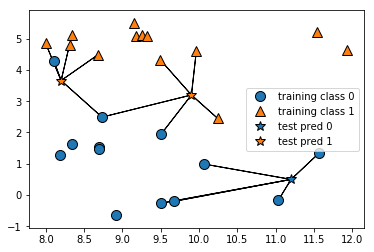

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(X_train, y_train)
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

#Plot KNN

mglearn.plots.plot_knn_classification(n_neighbors=5)
plt.show()

After testing a few k values, 5 seems to be the optimal k value (highest training and test values at 86% and 84% respectively. 

# Naive Bayes

In [13]:
# Try a Naive Bayes classifier
gnb = GaussianNB()
trainFit = gnb.fit(X_train,y_train)
print("Train Score: {:.4f}".format(trainFit.score(X_train,y_train)))
print("Test Score: {:.4f}".format(trainFit.score(X_test, y_test)))

Train Score: 0.8434
Test Score: 0.8429


In [14]:
# start monte-carlo for GaussianNB()
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
gnb = GaussianNB()
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    trainFit = gnb.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print("Mean Score:")
print("Train: {:.4f}".format(np.mean(trainScore)))
print("Test: {:.4f}".format(np.mean(testScore)))
print("STD Score:")
print("Train: {:.4f}".format(np.std(trainScore)))
print("Test: {:.4f}".format(np.std(testScore)))
print("Mean of test score greater than a random guess:")
print(np.mean(testScore>yGuess))

Mean Score:
Train: 0.8415
Test: 0.8416
STD Score:
Train: 0.0029
Test: 0.0058
Mean of test score greater than a random guess:
1.0


# Linear and Quadratic Discriminant

In [15]:
# start monte-carlo for LinearDiscriminant()
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
lda = LinearDiscriminantAnalysis()
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    trainFit = lda.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)

print("Mean Score:")
print("Train: {:.4f}".format(np.mean(trainScore)))
print("Test: {:.4f}".format(np.mean(testScore)))
print("STD Score:")
print("Train: {:.4f}".format(np.std(trainScore)))
print("Test: {:.4f}".format(np.std(testScore)))
print("Mean of test score greater than a random guess:")
print(np.mean(testScore>yGuess))

Mean Score:
Train: 0.8548
Test: 0.8534
STD Score:
Train: 0.0017
Test: 0.0055
Mean of test score greater than a random guess:
1.0


In [64]:
# Quadratic discriminant
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
qda = QuadraticDiscriminantAnalysis()
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    trainFit = qda.fit(X_train,y_train)
    trainScore[i] = trainFit.score(X_train,y_train)
    testScore[i] =  trainFit.score(X_test,y_test)
print("Mean Score:")
print("Train: {:.4f}".format(np.mean(trainScore)))
print("Test: {:.4f}".format(np.mean(testScore)))
print("STD Score:")
print("Train: {:.4f}".format(np.std(trainScore)))
print("Test: {:.4f}".format(np.std(testScore)))
print("Mean of test score greater than a random guess:")
print(np.mean(testScore>yGuess))

Mean Score:
Train: 0.8420
Test: 0.8429
STD Score:
Train: 0.0031
Test: 0.0041
Mean of test score greater than a random guess:
1.0


# Linear SVC

In [17]:
# start monte-carlo for LinearSVC() 
# Because of a high ineration number (10,000), it will take few seconds to print out the results.
nmc = 50
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
for Cval in [100., 1., 0.01]:
    lsvc = LinearSVC(C=Cval, max_iter = 10000)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
        trainFit = lsvc.fit(X_train,y_train)
        trainScore[i] = trainFit.score(X_train,y_train)
        testScore[i] =  trainFit.score(X_test,y_test)
    print('C=', Cval)
    print("Mean Score:")
    print("Train: {:.4f}".format(np.mean(trainScore)))
    print("Test: {:.4f}".format(np.mean(testScore)))
    print("STD Score:")
    print("Train: {:.4f}".format(np.std(trainScore)))
    print("Test: {:.4f}".format(np.std(testScore)))
    print("Mean of test score greater than a random guess:")
    print(np.mean(testScore>yGuess))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

C= 100.0
Mean Score:
Train: 0.7050
Test: 0.7053
STD Score:
Train: 0.2582
Test: 0.2572
Mean of test score greater than a random guess:
0.94


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

C= 1.0
Mean Score:
Train: 0.7345
Test: 0.7361
STD Score:
Train: 0.2516
Test: 0.2518
Mean of test score greater than a random guess:
0.94


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

C= 0.01
Mean Score:
Train: 0.7746
Test: 0.7753
STD Score:
Train: 0.1946
Test: 0.1963
Mean of test score greater than a random guess:
0.96


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# SVC

In [18]:
svc = SVC(kernel='rbf', C=1., gamma=1.0) # Kernel = rbf
trainFit = svc.fit(X_train,y_train)
print("Score:")
print("Train: {:.4f}".format(trainFit.score(X_train,y_train)))
print("Test: {:.4f}".format(trainFit.score(X_test,y_test)))

Score:
Train: 0.8714
Test: 0.8529


In [19]:
svc = SVC(kernel='poly', degree=2, C=1., gamma=1.0) # Kernel = poly
trainFit = svc.fit(X_train,y_train)
print("Score:")
print("Train: {:.4f}".format(trainFit.score(X_train,y_train)))
print("Test: {:.4f}".format(trainFit.score(X_test,y_test)))

Score:
Train: 0.8471
Test: 0.8372


# Decision Tree

In [46]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
print("Score:")
print("Training: {:.4f}".format(tree.score(X_train, y_train)))
print("Test: {:.4f}".format(tree.score(X_test, y_test)))

Score:
Training: 0.8601
Test: 0.8566


In [47]:
export_graphviz(tree, out_file = "tree.dot", class_names = ["Fatal", "Non-Fatal"],
                feature_names = ["Number_of_Engines","Engine_Type","Weather_Condition","Broad_Phase_of_Flight","Year"],
                impurity = False, filled = True) 

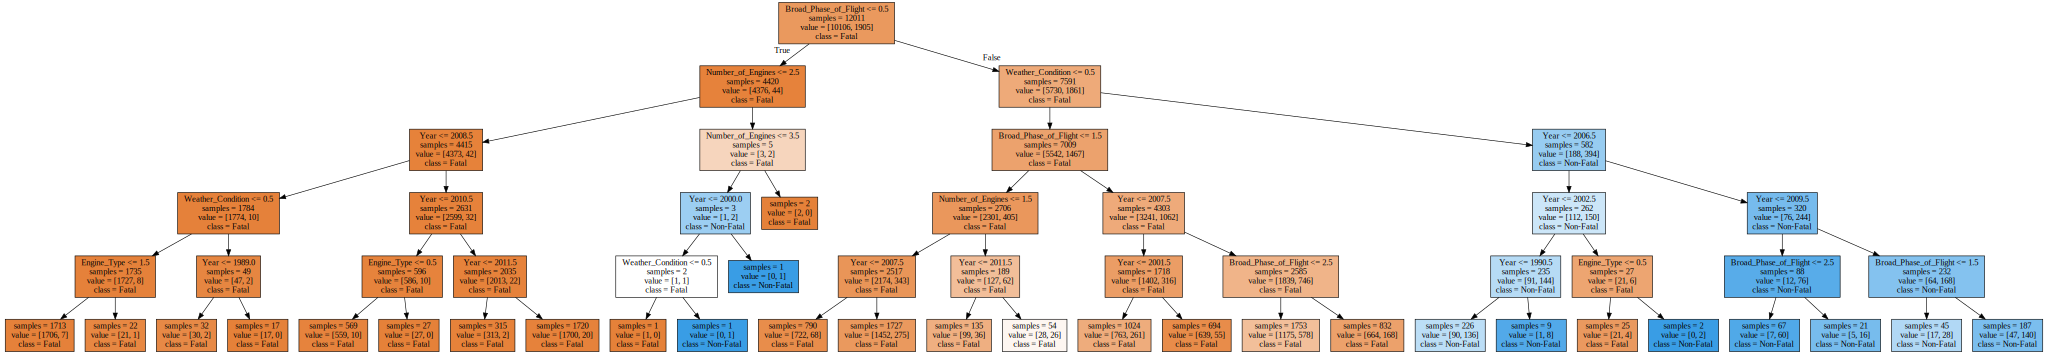

In [48]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [49]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.02233895 0.00389149 0.3399718  0.5190155  0.11478226]


Confusion matrix

In [50]:
y_predict = tree.predict(X_test)

cmat = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Fatal', 'Predicted Non-fatal'],
    index=['True Fatal', 'True Non-fatal']
)

print(cmat)

                Predicted Fatal  Predicted Non-fatal
True Fatal                 3313                   59
True Non-fatal              515                  117


# Random Forest

In [88]:
print(aviation.columns.values)
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), aviation.columns.values[1:6])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

['Injury_Severity' 'Number_of_Engines' 'Engine_Type' 'Weather_Condition'
 'Broad_Phase_of_Flight' 'Year']


In [89]:
forest = RandomForestClassifier(n_estimators=50, max_features=3, max_depth=5)  
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.861
Accuracy on test set: 0.857


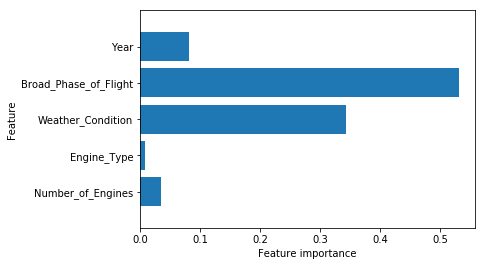

In [90]:
plot_feature_importances(forest)

Confusion Matrix

In [91]:
y_predict = forest.predict(X_test)

cmat = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Fatal', 'Predicted Non-fatal'],
    index=['True Fatal', 'True Non-fatal']
)

print(cmat)

                Predicted Fatal  Predicted Non-fatal
True Fatal                 3307                   58
True Non-fatal              515                  124


# Conclusion

All of our models generate test scores above 83% and work well for the aviation data. Scores across different models are actually fairly close to each other, all within the 83%-86% range. The models that work better over others are SVC, Linear Discriminant, Decision Tree and Random Forest. The Random Forest outperforms all the others. Overall, there is little overfitting. 

We conclude that aviation characteristics including number of engines, engine type, aircraft maker, phase of flight and weather condition have predictive power over the results of aviation accidents: fatal or non-fatal. Among these features, phase of flight and weather condition are the most important. We hypothesize that certain phases of the flight may be more difficult to perform or navigate for a pilot and thus there would be a likelier chance of crashing. In addition, certain weather conditions (such as rain and fog) reduce visibility and can make flying conditions challenging. 